c_p 0.396952679731114
c_q 0.353553390593274
check int of p:  (0.9999999999999998, 3.293715347748319e-09)
check int of q:  (1.0, 8.45455171605454e-09)


/usr/local/lib/python3.6/dist-packages/sympy/plotting/plot.py:890: MatplotlibDeprecationWarning: 
The set_smart_bounds function was deprecated in Matplotlib 3.2 and will be removed two minor releases later.
  self.ax.spines['left'].set_smart_bounds(True)
/usr/local/lib/python3.6/dist-packages/sympy/plotting/plot.py:891: MatplotlibDeprecationWarning: 
The set_smart_bounds function was deprecated in Matplotlib 3.2 and will be removed two minor releases later.
  self.ax.spines['bottom'].set_smart_bounds(False)


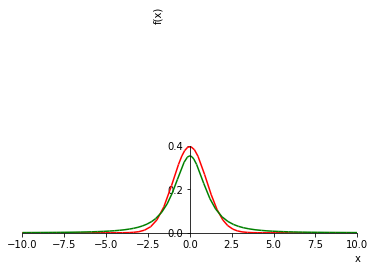

shannon entropy p):  (1.4390371808457618, 7.7442255277233e-09)
shannon entropy p check):  1.43903718084576
shannon entropy p from tfp:  tf.Tensor(1.4390385, shape=(), dtype=float32) 


shannon entropy q):  (1.9602792291600533, 5.470919273165009e-10)
shannon entropy q check):  1.96027922916008
shannon entropy q from tfp:  tf.Tensor(1.9602796, shape=(), dtype=float32) 


kl divergence (relative entropy) from integral:  (0.1087010474411782, 4.458358510643375e-09)


In [126]:
import numpy as np
from sympy import * 
from sympy.plotting import plot

from scipy import integrate
from scipy.special import beta as beta
from scipy.special import digamma as digamma 

import tensorflow as tf
import tensorflow_probability as tfp

distribution_p = tfp.distributions.StudentT(df=nu_p, loc=0, scale=1 )
distribution_q = tfp.distributions.StudentT(df=nu_q, loc=0, scale=1 )

nu_p = 50;  c_p = gamma((nu_p+1)/2)/(sqrt(nu_p*pi)*gamma(nu_p/2))
nu_q = 2;  c_q = gamma((nu_q+1)/2)/(sqrt(nu_q*pi)*gamma(nu_q/2))
print('c_p', N(gamma((nu_p+1)/2)/(sqrt(nu_p*pi)*gamma(nu_p/2))))
print('c_q', N(gamma((nu_q+1)/2)/(sqrt(nu_q*pi)*gamma(nu_q/2))))

p_sym = c_p*(1+x**2/nu_p)**(-(nu_p+1)/2)
q_sym = c_q*(1+x**2/nu_q)**(-(nu_q+1)/2)

p = lambda x: c_p*(1+x**2/nu_p)**(-(nu_p+1)/2)
q = lambda x: c_q*(1+x**2/nu_q)**(-(nu_q+1)/2)

kl_ = lambda x: p(x)*log(p(x)/q(x))

print('check int of p: ', integrate.quad(p, -np.inf, np.inf))
print('check int of q: ', integrate.quad(q, -np.inf, np.inf))

plot_1 = plot(p_sym, show=False, line_color='red')
plot_2 = plot(q_sym, show=False, line_color='green')
plot_1.append(plot_2[0])
plot_1.show()
#plot_2.show()

temp_ = lambda x, c, nu: -c*(1+x**2/nu)**(-(nu+1)/2)*log(c*(1+x**2/nu)**(-(nu+1)/2))
print('shannon entropy p): ', integrate.quad(temp_, -np.inf, np.inf, args=(c_p, nu_p)))
print('shannon entropy p check): ', N( (nu_p+1)/2 * (digamma((nu_p+1)/2) - digamma(nu_p/2)) + log( sqrt(nu_p)*beta(nu_p/2,1/2))) )
print('shannon entropy p from tfp: ', distribution_p.entropy(), '\n\n')

print('shannon entropy q): ', integrate.quad(temp_, -np.inf, np.inf, args=(c_q, nu_q)))
print('shannon entropy q check): ', N( (nu_q+1)/2 * (digamma((nu_q+1)/2) - digamma(nu_q/2)) + log( sqrt(nu_q)*beta(nu_q/2,1/2))) )
print('shannon entropy q from tfp: ', distribution_q.entropy(), '\n\n')

#print('kl divergence (relative entropy) from integral: ', integrate(p*(log(p)-log(q)), (x,-oo,oo)))
#print('kl divergence from formula: ', N(log(sigma_q/sigma_p)+(sigma_p**2 +(mu_p-mu_q)**2)/(2*sigma_q**2) -1/2))
#print('kl divergence from tfp: ', kl_)

print('kl divergence (relative entropy) from integral: ', integrate.quad(kl_, -np.inf, np.inf) )









#print('integral: ', integrate(q, (x,-oo,oo)).evalf())



/usr/local/lib/python3.6/dist-packages/sympy/plotting/plot.py:890: MatplotlibDeprecationWarning: 
The set_smart_bounds function was deprecated in Matplotlib 3.2 and will be removed two minor releases later.
  self.ax.spines['left'].set_smart_bounds(True)
/usr/local/lib/python3.6/dist-packages/sympy/plotting/plot.py:891: MatplotlibDeprecationWarning: 
The set_smart_bounds function was deprecated in Matplotlib 3.2 and will be removed two minor releases later.
  self.ax.spines['bottom'].set_smart_bounds(False)


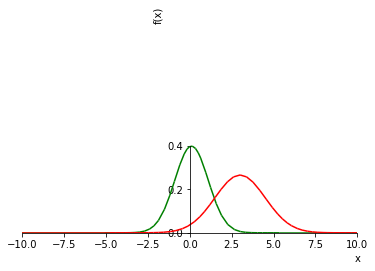

p integral:  1.00000000000000
q integral:  1.00000000000000 


kl divergence (relative entropy) from integral:  0.5*log(2) + 4.07796130161186
kl divergence from formula:  4.42453489189184
kl divergence from tfp:  tf.Tensor(4.4245353, shape=(), dtype=float32) 


shannon entropy p):  1.82440364131284
shannon entropy p check):  1.82440364131284
shannon entropy p from tfp:  tf.Tensor(1.8244036, shape=(), dtype=float32) 


shannon entropy q):  1.41893853320467
shannon entropy q check):  1.41893853320467
shannon entropy q from tfp:  tf.Tensor(1.4189385, shape=(), dtype=float32) 




In [123]:
import sympy
from sympy.plotting import plot

import tensorflow as tf
import tensorflow_probability as tfp

mu_p = 3;   sigma_p = 1.5; 
p_sym = (1/sqrt(2*pi*sigma_p**2))*exp(-1/2*((x-mu_p)/sigma_p)**2)
mu_q = 0.1; sigma_q = 1; 
q_sym= (1/sqrt(2*pi*sigma_q**2))*exp(-1/2*((x-mu_q)/sigma_q)**2)

distribution_p = tfp.distributions.Normal(loc=mu_p, scale=sigma_p)
distribution_q = tfp.distributions.Normal(loc=mu_q, scale=sigma_q)

kl_ = tfp.distributions.kl_divergence(
    distribution_p, distribution_q, allow_nan_stats=True, name=None
)

plot_1 = plot(p_sym, show=False, line_color='red')
plot_2 = plot(q_sym, show=False, line_color='green')
plot_2.append(plot_1[0])
plot_2.show()

print('p integral: ', N(sympy.integrate(p_sym, (x,-oo,oo))) )
print('q integral: ', N(sympy.integrate(q_sym, (x,-oo,oo))) , '\n\n')
print('kl divergence (relative entropy) from integral: ', sympy.integrate(p_sym*(log(p_sym)-log(q_sym)), (x,-oo,oo)))
print('kl divergence from formula: ', N(log(sigma_q/sigma_p)+(sigma_p**2 +(mu_p-mu_q)**2)/(2*sigma_q**2) -1/2))
print('kl divergence from tfp: ', kl_, '\n\n')

print('shannon entropy p): ', N(sympy.integrate(-p_sym*log(p_sym), (x,-oo,oo))) )
print('shannon entropy p check): ', N(1/2*log(2*pi*exp(1)*sigma_p**2)))
print('shannon entropy p from tfp: ', distribution_p.entropy(), '\n\n')

print('shannon entropy q): ', N(sympy.integrate(-q_sym*log(q_sym), (x,-oo,oo))) )
print('shannon entropy q check): ', N(1/2*log(2*pi*exp(1)*sigma_q**2)))
print('shannon entropy q from tfp: ', distribution_q.entropy(), '\n\n')

#print('integral: ', integrate(q, (x,-oo,oo)).evalf())

